# **generativeai_gemini-pro**

In [11]:
!pip install google-generativeai -q

!pip install -q -U google-generativeai

In [12]:
!pip show google-generativeai

Name: google-generativeai
Version: 0.3.2
Summary: Google Generative AI High level API client library and tools.
Home-page: https://github.com/google/generative-ai-python
Author: Google LLC
Author-email: googleapis-packages@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: google-ai-generativelanguage, google-api-core, google-auth, protobuf, tqdm, typing-extensions
Required-by: 


In [5]:
!python --version

Python 3.10.12


In [34]:
import pathlib
import textwrap

import google.generativeai as genai

# Used to securely store your API key
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [35]:
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [15]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-pro
models/gemini-pro-vision


In [16]:

model = genai.GenerativeModel('gemini-pro')

In [17]:

%%time
response = model.generate_content("What is the meaning of life?")

CPU times: user 80.3 ms, sys: 14.2 ms, total: 94.5 ms
Wall time: 9.64 s


In [18]:
to_markdown(response.text)

> The meaning of life is a deep philosophical question that has intrigued thinkers and philosophers throughout history. There is no one definitive answer to this question, as it is a subjective and personal one that varies from individual to individual. Some common themes that have emerged in discussions about the meaning of life include:
> 
> 1. **Purpose and Goal Setting**: Some individuals find meaning in setting goals and working towards achieving them. This can involve pursuing personal ambitions, making a positive impact on the world, or fulfilling one's potential.
> 
> 2. **Relationships and Social Connections**: Many people find meaning in their relationships with others, such as family, friends, and loved ones. Building strong social connections and fostering meaningful relationships can bring a sense of purpose and fulfillment.
> 
> 3. **Personal Growth and Development**: Others find meaning in the pursuit of personal growth and self-improvement. This can involve learning new skills, exploring different perspectives, and challenging oneself to become a better person.
> 
> 4. **Contribution to Society**: Some individuals find meaning in making a positive contribution to society, whether through their work, volunteer activities, or advocacy for causes they believe in. Leaving a lasting impact and making a difference in the world can provide a sense of purpose and meaning.
> 
> 5. **Experiencing Life**: Some people believe that the meaning of life is simply to experience it fully and mindfully. This can involve appreciating the beauty of nature, savoring moments of joy, and connecting with the world around us.
> 
> 6. **Transcendence and Spirituality**: For some, the meaning of life is found in seeking spiritual enlightenment, transcending the limitations of the self, and connecting with a higher power or universal consciousness.
> 
> Ultimately, the meaning of life is a personal journey that each individual must explore and discover for themselves. It is a dynamic process that can evolve and change over time as one's experiences, values, and perspectives shift.

https://github.com/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb

In [36]:
model = genai.GenerativeModel('gemini-pro')

In [38]:
%%time
response = model.generate_content("The opposite of hot is")


CPU times: user 48.9 ms, sys: 1.54 ms, total: 50.5 ms
Wall time: 5.17 s


In [39]:
print(response.text)

cold


# **generativeai_gemini-pro-vision**

## Generate text from image and text inputs
Gemini provides a multimodal model (gemini-pro-vision) that accepts both text and images and inputs. The GenerativeModel.generate_content API is designed to handle multimodal prompts and returns a text output.

In [19]:
!curl -o image.jpg https://t0.gstatic.com/licensed-image?q=tbn:ANd9GcQ_Kevbk21QBRy-PgB4kQpS79brbmmEG7m3VOTShAn4PecDU5H5UxrJ

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    43  100    43    0     0    733      0 --:--:-- --:--:-- --:--:--   728


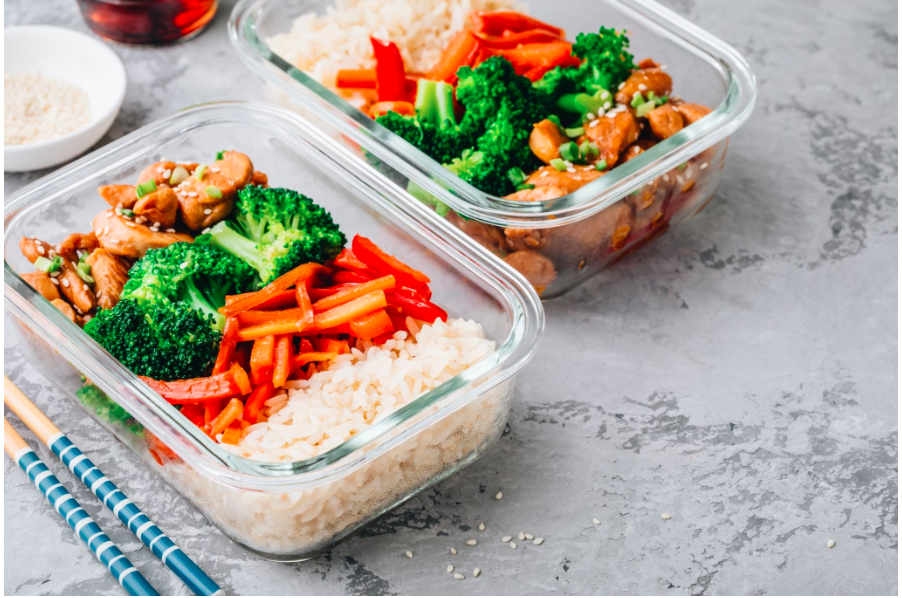

In [22]:
import PIL.Image

img = PIL.Image.open('/content/image_1.png')
img

In [21]:

model = genai.GenerativeModel('gemini-pro-vision')

In [23]:
%%time
response = model.generate_content(img)

to_markdown(response.text)

>  Meal prepping is a great way to save time and money, and it can also help you to eat healthier. By planning your meals ahead of time and cooking them in bulk, you can make sure that you have healthy and nutritious meals ready to eat when you need them.
> 
> There are many different ways to meal prep, but one popular method is to cook a large batch of protein, such as chicken or tofu, and then divide it into individual portions. You can then pair the protein with different vegetables and grains to create a variety of meals.
> 
> Another popular meal prepping method is to make a big batch of soup or stew. This can be a great way to use up leftover vegetables and meat, and it can also be a very economical way to eat.
> 
> No matter how you choose to meal prep, it can be a great way to improve your health and save time and money. Here are some tips for getting started:
> 
> * Start small. Don't try to meal prep for the entire week all at once. Start by prepping just a few meals for the week.
> * Choose recipes that are easy to make and that you enjoy eating.
> * Use fresh, healthy ingredients.
> * Cook your meals in bulk and then divide them into individual portions.
> * Store your meals in airtight containers in the refrigerator or freezer.
> * When you're ready to eat a meal, simply reheat it and enjoy!
> 
> Meal prepping can be a great way to make your life easier and healthier. By following these tips, you can get started meal prepping today!

In [27]:
%%time
response = model.generate_content(["Write a short, engaging blog post based on this picture. It should include a description of the meal in the photo and talk about my journey meal prepping.", img]
                                  , stream=False)
# response.resolve()

CPU times: user 369 ms, sys: 26 ms, total: 395 ms
Wall time: 18.7 s


In [28]:
to_markdown(response.text)

>  Meal prepping is a great way to save time and money, and it can also help you to eat healthier. When you meal prep, you cook a large batch of food ahead of time and then divide it into individual portions that you can easily grab and go during the week.
> 
> This meal-prepped lunch bowl is perfect for busy people on the go! This bowl has brown rice, roasted vegetables, and chicken teriyaki. It's packed with protein and fiber, which will keep you feeling full and energized all day long.
> 
> If you're new to meal prepping, I encourage you to give it a try! It's a great way to improve your health and save time in the kitchen.

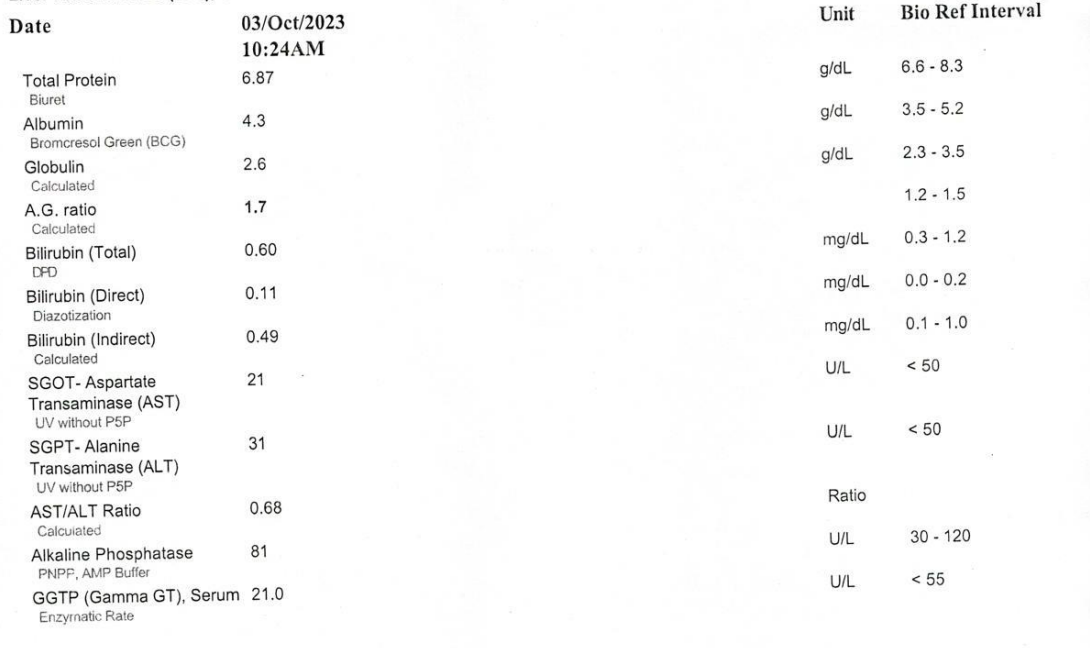

In [29]:
import PIL.Image

img = PIL.Image.open('/content/a1.png')
img



In [31]:
%%time

input_prompt = """
               You are an expert in understanding Health laboratory report.
               You will receive input images as laboratory report &
               you will have to answer questions based on the input image
               """

# Prepare contents
prompt = """
            find out all the Lab Test Names in same line values or result and Unit for that Test Names should be present,
            sometime unit may not be present, extact data very accurately
            if data present then answer in format like list of dict [{'TestName': value, 'Result': value, 'Unit': value},...]
            if data not present then answer in format like empty list []
        """
# prompt = "Describe this image?"
contents = [input_prompt, img, prompt]

response = model.generate_content(contents , stream=False)

CPU times: user 159 ms, sys: 13 ms, total: 172 ms
Wall time: 13.2 s


In [32]:
to_markdown(response.text)

>  [{'TestName': 'Total Protein', 'Result': '6.87', 'Unit': 'g/dL'}, {'TestName': 'Albumin', 'Result': '4.3', 'Unit': 'g/dL'}, {'TestName': 'Bilirubin', 'Result': '0.6', 'Unit': 'mg/dL'}, {'TestName': 'SGOT-Aspartate Transaminase (AST)', 'Result': '21', 'Unit': 'U/L'}, {'TestName': 'SGPT-Alanine Transaminase (ALT)', 'Result': '31', 'Unit': 'U/L'}, {'TestName': 'Alkaline Phosphatase', 'Result': '81', 'Unit': 'U/L'}]

In [33]:
print(response.text)

 [{'TestName': 'Total Protein', 'Result': '6.87', 'Unit': 'g/dL'}, {'TestName': 'Albumin', 'Result': '4.3', 'Unit': 'g/dL'}, {'TestName': 'Bilirubin', 'Result': '0.6', 'Unit': 'mg/dL'}, {'TestName': 'SGOT-Aspartate Transaminase (AST)', 'Result': '21', 'Unit': 'U/L'}, {'TestName': 'SGPT-Alanine Transaminase (ALT)', 'Result': '31', 'Unit': 'U/L'}, {'TestName': 'Alkaline Phosphatase', 'Result': '81', 'Unit': 'U/L'}]
